In [11]:
import numpy as np
import pandas as pd
import os
import h2o
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,18 hours 8 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.8
H2O cluster version age:,1 month and 6 days
H2O cluster name:,H2O_from_python_felix_nh59a7
H2O cluster total nodes:,1
H2O cluster free memory:,2.855 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"locked, healthy"


In [3]:
os.getcwd()

'/Users/felix/Documents/felix/Learning/H2O/Coursera_Practical_Machine_Learning'

In [7]:
x = [z*0.01 for z in range(0,1001)]
print(x[0:5])
print(x[995:1001])

[0.0, 0.01, 0.02, 0.03, 0.04]
[9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0]


In [8]:
y = np.sin(x)

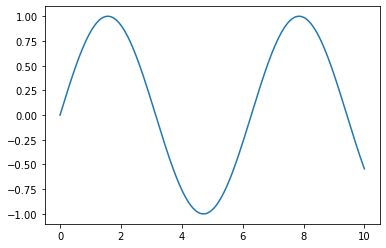

In [13]:
plt.plot(x,y)


In [14]:
y = y + np.random.normal(0, 0.1, len(x))

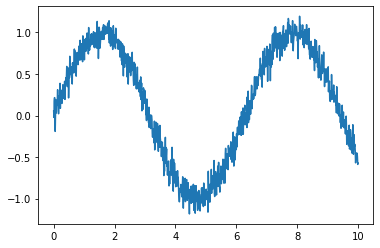

In [15]:
plt.plot(x,y)

In [19]:
sine_wave = pd.DataFrame({'a':x, 'b':y}) ### Note the curly braces 

In [20]:
sine_wave_h2o = h2o.H2OFrame(sine_wave)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
sine_wave_h2o.summary()

,a,b
type,real,real
mins,0.0,-1.1845570804053749
mean,4.999999999999934,0.18363456933447567
maxs,10.0,1.1954505920605465
sigma,2.891081112663593,0.6707037969140138
zeros,1,0
missing,0,0
0,0.0,0.0532710092257229
1,0.01,-0.022547533036946912
2,0.02,0.17389200034386812


In [22]:
sine_wave_h2o.shape

(1001, 2)

In [23]:
sine_wave_h2o.dim

[1001, 2]

In [24]:
sine_wave_h2o.col_names

['a', 'b']

In [25]:
sine_wave_h2o.columns

['a', 'b']

In [26]:
sine_wave_h2o.columns_by_type

a,b
0,0.053271
0.01,-0.0225475
0.02,0.173892
0.03,0.215767
0.04,-0.0662457
0.05,-0.191
0.06,0.0135873
0.07,0.19005
0.08,0.0295356
0.09,0.0449337


<bound method H2OFrame.columns_by_type of >

### if you go look in flow under "get frames" you will see that the data frame name is very different. 

### In this case it was something like "Key_Frame__upload_8da93838cf538cfa793bd6fa531a464b.hex".

In [27]:
sine_wave_h2o = h2o.H2OFrame(sine_wave, destination_frame="sine_wave_from_py")

Parse progress: |█████████████████████████████████████████████████████████| 100%


### to convert back to pandas data frame

In [29]:
df = sine_wave_h2o.as_data_frame()

In [30]:
type(df)

pandas.core.frame.DataFrame